<a href="https://colab.research.google.com/github/aitorvv96/BioEcon.AdaptiveManagement/blob/master/Tensorflow/Zero_to_Mastery/on_air_notebooks/02_Neural_network_classification_in_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

Few classification types:
- binary
- multiclass
- multilabel

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is binary

our data is hard to understand now, let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


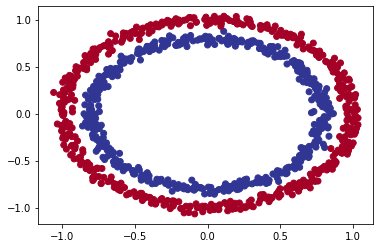

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# how many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak the model
6. evaluate...

In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
# 0. set seed
tf.random.set_seed(42)

# 1. create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy( ),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.0649 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.9150 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.0208 - accuracy: 0.5180
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 3.3979 - accuracy: 0.5140
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.0153 - accuracy: 0.5020


In [ ]:
# let's try and improve our model training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on binary classification and we obtained 50% accuracy our model is not too good...
let's add an extra layer

In [ ]:
# 0. set seed
tf.random.set_seed(42)

# 1. create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932903528213501, 0.5]

## Improving our model

let's look how to improve our model
1. create a model - add more layers or increase the number of hidden units
2. compile a model - choose a different optimizer or learning rate
3. fitting a model - more epochs (training for longer)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile a model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. evaluate a model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5090


[0.696610152721405, 0.5090000033378601]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


to visualize our model predictions, let's create a function; this function will

* take in a trained model, features (X) and labels (y)
* create a meshgrid of the different X values
* make predictions across the mesghgrid
* plot the predictions as well as a line between zones

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  
                

313/313 [==============================] - 1s 2ms/step
doing binary classification


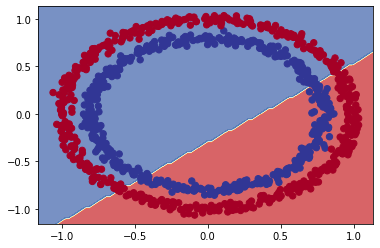

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary (model=model_3,
                    X=X, 
                    y=y)

In [ ]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:] 


# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile a model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100, verbose=0)

2/2 [==============================] - 0s 6ms/step


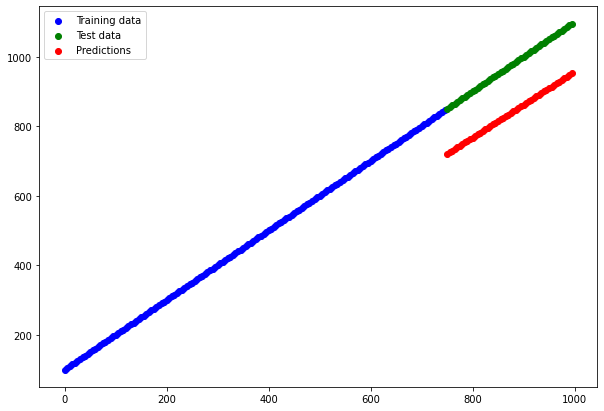

In [ ]:
# Make predictions
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test , c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

In [ ]:
 # Set the random seed
 tf.random.set_seed(42)

 # 1. Create the model
 model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
 ])

 # 2. Compile the model
 model_4.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])
 
 # 3. Fit the model
 model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7063 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6992 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6770 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6304 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5480 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5098 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3796 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2775 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1201 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9339 - accuracy: 0.4750
Epoch 11/

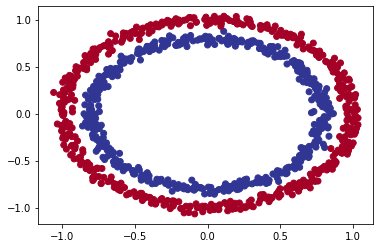

In [ ]:
# check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


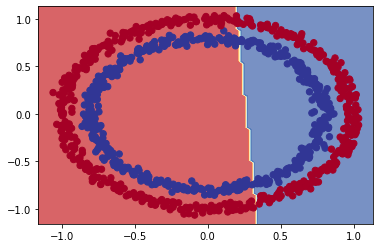

In [ ]:
# Check the decisions boundary
plot_decision_boundary(model=model_4,
                       X=X, y=y)

Let's try a NN with non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.6096 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9989 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7660 - accuracy: 0.4400
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7473 - accuracy: 0.4240
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7372 - accuracy: 0.3850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.4270
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7248 - accuracy: 0.3330
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.3630
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.3480
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.4130
Epoch 11/

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 6ms/step - loss: 3.0871 - accuracy: 0.4820
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 2.9852 - accuracy: 0.4760
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 2.8549 - accuracy: 0.4770
Epoch 4/250
32/32 [==============================] - 0s 5ms/step - loss: 2.7609 - accuracy: 0.4710
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 2.6946 - accuracy: 0.4690
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 2.5967 - accuracy: 0.4560
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 2.4665 - accuracy: 0.4490
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 2.3028 - accuracy: 0.4510
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 2.0938 - accuracy: 0.4680
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 2.0362 - accuracy: 0.4620
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.9220


[0.2889215052127838, 0.921999990940094]

313/313 [==============================] - 1s 2ms/step
doing binary classification


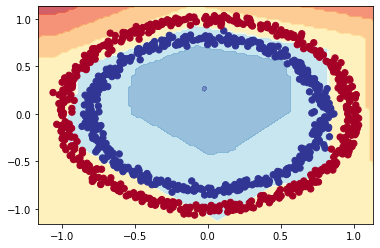

In [ ]:
# how do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.7114 - accuracy: 0.4930
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.4980
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4960
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4910
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.4750
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4920
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4690
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4660
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4860
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


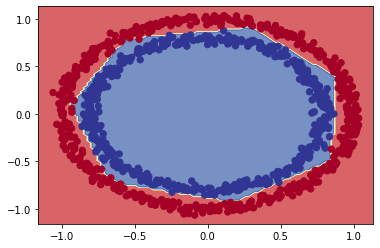

In [ ]:
# plot it
plot_decision_boundary(model_7, X, y)

The combination of linear and non-linear functions is one of the keys of neural networks

Now, let's see linear and non-linear functions in action

In [ ]:
# Create a toy a tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

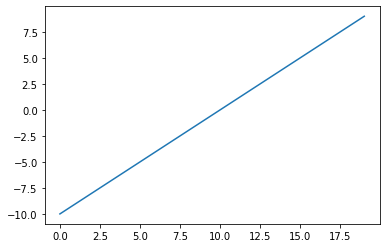

In [ ]:
# visualize it
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

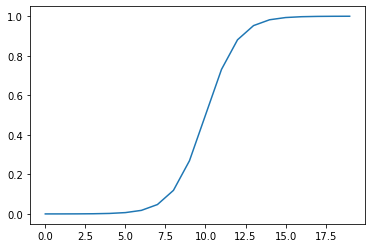

In [ ]:
# Plot it
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0, x)

# Use the relu function on out toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

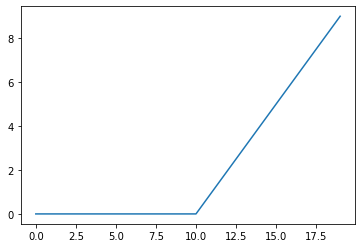

In [ ]:
# Plot it
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
def linear(x):
  return x

# Use the linear function to our toy tensor
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

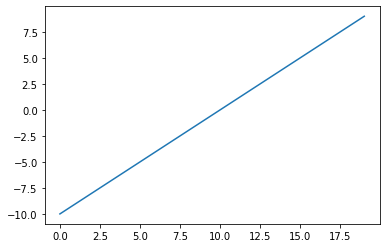

In [ ]:
# Plot it
plt.plot(linear(A))

In [ ]:
# any changes?
A == linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...
Let's create a training and test set

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7064 - accuracy: 0.4512
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4988
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5562
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5650
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.6463
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.5850
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.7400
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6090 - accuracy: 0.8275
Epoch 9/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5741 - accuracy: 0.8400
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5311 - accuracy: 0.9025
Epoch 11/25
25/25 [

In [ ]:
# Evaluate the model on the test set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9900


[0.08289381861686707, 0.9900000095367432]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 2s 6ms/step
doing binary classification


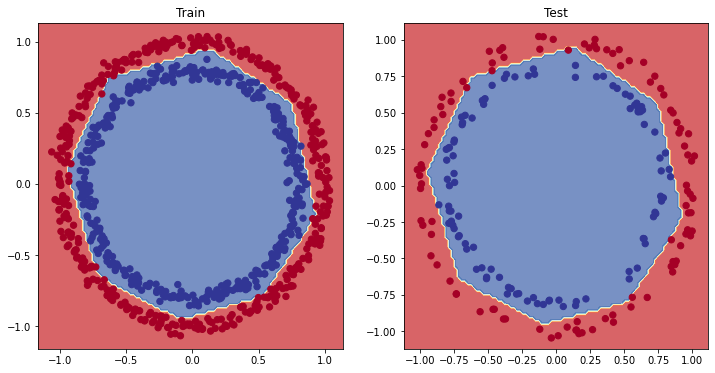

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.706425,0.45125
1,0.693736,0.49875
2,0.685760,0.55625
3,0.678457,0.56500
4,0.667700,0.64625
5,0.652606,0.58500
6,0.632405,0.74000
7,0.609017,0.82750
8,0.574132,0.84000
9,0.531107,0.90250


Text(0.5, 1.0, 'Model_8 loss curves')

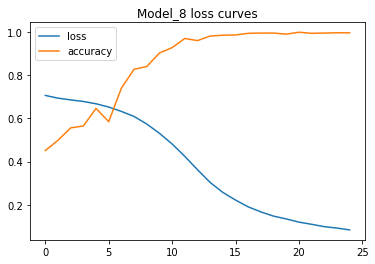

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

For many problems, the loss function going down means the model is improving

## Finding the best learning rate

To find the ideal learning rate (where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training
* Another model (we could use the same one as above)
* A modifies loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# 2.5. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.7079 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7075 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7070 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7065 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7059 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7054 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7047 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7042 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss:

<AxesSubplot:xlabel='epochs'>

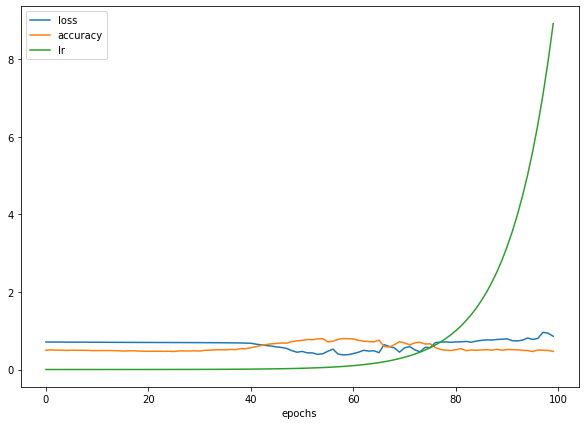

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs Loss')

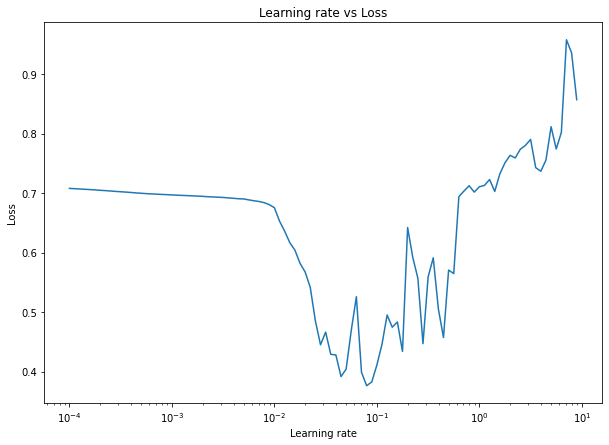

In [ ]:
# Plot the learning rate values against the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

The ideal lr is where the curve decreases the most, and before the lowest value of the curve

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* lr with the same model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with the ideal learning rate
model_10.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 6ms/step - loss: 0.7047 - accuracy: 0.4737
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4888
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.4988
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5013
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4963
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5063
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.5013
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6939 - accuracy: 0.5013
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4938
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4950


[0.6931580901145935, 0.4950000047683716]

In [ ]:
# Evaluate model 8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9900


[0.08289381861686707, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

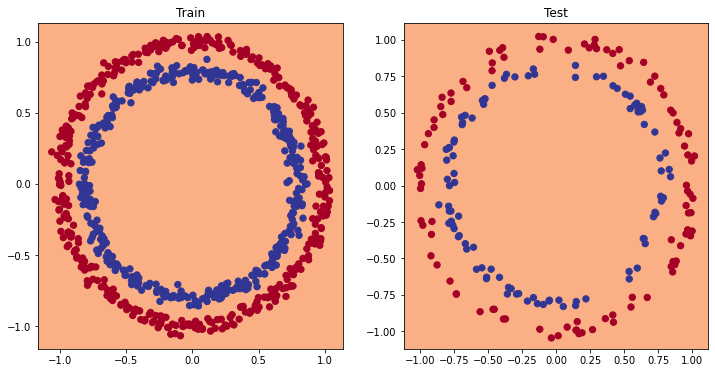

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test  )
plt.show

## More classification and evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4950
Model loss on the test set: 0.6931580901145935
Model accuracy on the test set: 49.50%


## How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10] # binary

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10] # probability

array([[0.50051993],
       [0.50051993],
       [0.50051993],
       [0.50051993],
       [0.50051993],
       [0.50051993],
       [0.50051993],
       [0.50051993],
       [0.50051993],
       [0.50051993]], dtype=float32)

Predictions is in a probability form and test in binary 

In [ ]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[  0, 101],
       [  0,  99]])

How about we prettify our confusion matrix?

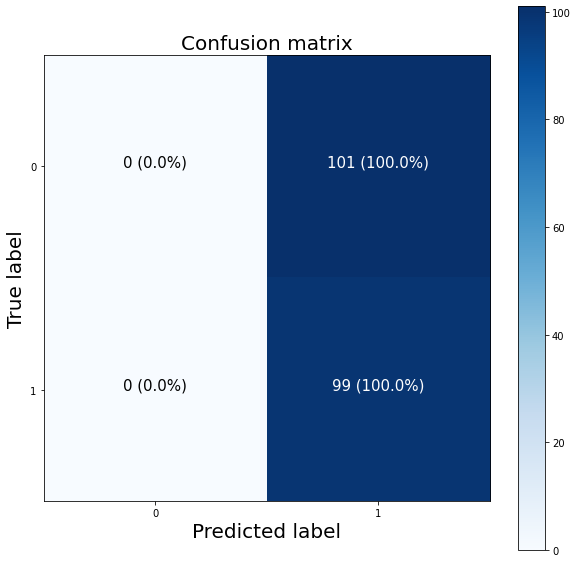

In [ ]:
# remix of sklearn and plot confusion matrix function

import itertools
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the test on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)

In [ ]:
import itertools

def plot_confusion_matrix(y_test = y_test, y_preds = y_preds):
  """
  A function to plot a confusion matrix
  """
    # remix of sklearn and plot confusion matrix function
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the test on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=15)

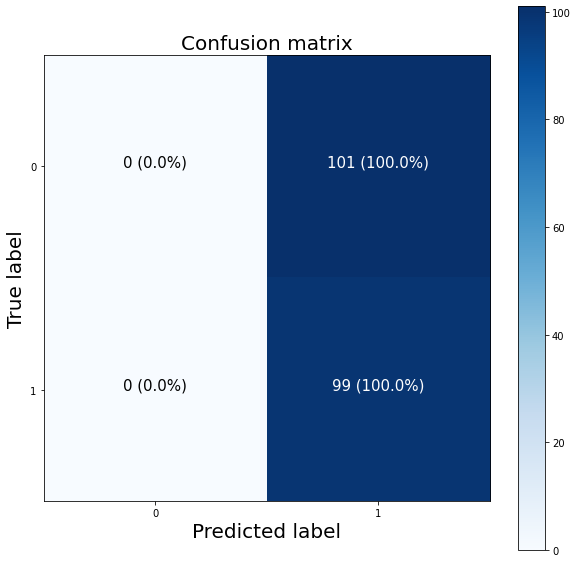

In [ ]:
plot_confusion_matrix(y_test, y_preds)

# Working with a larger example (multiclass classification)

Having more than 2 classes as an option, it is known as multi-class classification

To practice, we will classify clothes

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# https://github.com/zalandoresearch/fashion-mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

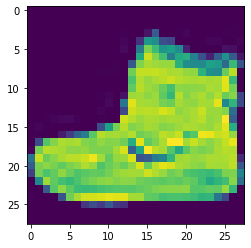

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Check out samples label
train_labels[0]

9

In [ ]:
# Create a small list so we can index onto our training labels so they are human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle bot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

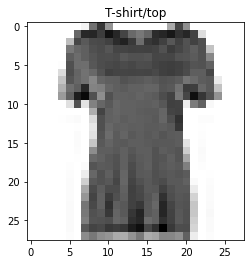

In [ ]:
# Plot an example image and it's label
test = 10
plt.imshow(train_data[test], cmap=plt.cm.binary)
plt.title(class_names[train_labels[test]])

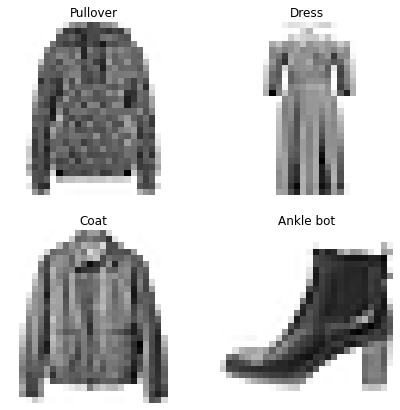

In [ ]:
# Plot multiple random imagen of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, changing a few things:
- input shape: 28 x 28 (shape of one image)
- output shape: 10 (one per class of clothing)
- loss function;
  - if labels are one_hot encoded, use tf.keras.losses.CategorialCrossentropy()
  - if labels are not one_hot encoded use tf.keras.losses.SparseCategorialCrossentropy()
- output layer activation = softmax (not sigmoid)

In [ ]:
# Set random seer
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # our data needs to be flatten
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # changed for having labels as integer
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2461 - accuracy: 0.1685 - val_loss: 2.1002 - val_accuracy: 0.1945
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.9587 - accuracy: 0.2134 - val_loss: 1.7761 - val_accuracy: 0.2576
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6814 - accuracy: 0.2728 - val_loss: 1.6392 - val_accuracy: 0.2677
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6110 - accuracy: 0.2976 - val_loss: 1.5786 - val_accuracy: 0.3126
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5690 - accuracy: 0.3170 - val_loss: 1.5512 - val_accuracy: 0.3216
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5496 - accuracy: 0.3242 - val_loss: 1.5369 - val_accuracy: 0.3415
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5345 - accuracy: 0.3282 - val_loss: 1.5315 - val_accura

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (normalized); this means they like to have numbers in the tensor between 0 and 1

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / float(train_data.max())
test_data_norm = test_data / float(test_data.max())

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # our data needs to be flatten
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # changed for having labels as integer
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5211 - accuracy: 0.4115 - val_loss: 1.2506 - val_accuracy: 0.5237
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0803 - accuracy: 0.5832 - val_loss: 0.9851 - val_accuracy: 0.6161
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9100 - accuracy: 0.6434 - val_loss: 0.8853 - val_accuracy: 0.6536
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7930 - accuracy: 0.7087 - val_loss: 0.7519 - val_accuracy: 0.7375
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7008 - accuracy: 0.7539 - val_loss: 0.7108 - val_accuracy: 0.7501
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6705 - accuracy: 0.7634 - val_loss: 0.7054 - val_accuracy: 0.7463
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6532 - accuracy: 0.7691 - val_loss: 0.6995 - val_accuracy:

Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

<AxesSubplot:title={'center':'Normalized data'}>

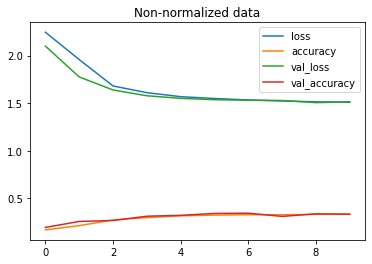

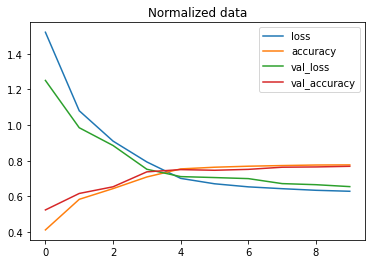

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

The same model with even slightly different data can produce dramatically different results. When you are comparing models, it is important to make sure you are comparing them on the same criteria

## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1282 - accuracy: 0.5722 - val_loss: 0.8230 - val_accuracy: 0.6961 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7134 - accuracy: 0.7550 - val_loss: 0.6772 - val_accuracy: 0.7684 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6136 - accuracy: 0.7906 - val_loss: 0.6203 - val_accuracy: 0.7863 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5673 - accuracy: 0.8076 - val_loss: 0.5953 - val_accuracy: 0.7935 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5444 - accuracy: 0.8152 - val_loss: 0.6011 - val_accuracy: 0.7963 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5319 - accuracy: 0.8168 - val_loss: 0.5909 - val_accuracy: 0.7911 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 10

Text(0.5, 1.0, 'Finding the ideal learning rate')

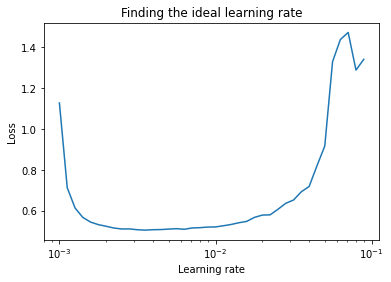

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

# ideal learning rate = 0.001

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fit the model
history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1551 - accuracy: 0.5888 - val_loss: 0.7851 - val_accuracy: 0.7382
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6976 - accuracy: 0.7628 - val_loss: 0.6995 - val_accuracy: 0.7591
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6433 - accuracy: 0.7790 - val_loss: 0.6572 - val_accuracy: 0.7766
Epoch 4/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6197 - accuracy: 0.7853 - val_loss: 0.6342 - val_accuracy: 0.7820
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6059 - accuracy: 0.7900 - val_loss: 0.6269 - val_accuracy: 0.7821
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5953 - accuracy: 0.7927 - val_loss: 0.6538 - val_accuracy: 0.7694
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5884 - accuracy: 0.7956 - val_loss: 0.6202 - val_accuracy:

## Evaluating our multi-class classification model

TO evaluate it:
- evaluate its performance using other classification metrics (such as a confusion matrix)
- asses some of its predictions (through visualizations)
- improve its results (by training it for longer or changing the architecture)
- save and export it for use in an app

Let's go through the top 2...

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the test on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction preobabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.1288225e-09, 2.9129252e-09, 1.7638935e-12, 1.6114804e-05,
        9.9626320e-08, 2.1986744e-01, 1.8030835e-08, 1.0614780e-01,
        8.3926711e-03, 6.6557592e-01],
       [3.9527142e-05, 1.9122785e-13, 8.8667953e-01, 1.3171416e-06,
        9.2752121e-02, 0.0000000e+00, 2.0527201e-02, 0.0000000e+00,
        3.6747088e-07, 2.9489186e-29],
       [4.3518604e-03, 9.9298620e-01, 2.7698613e-10, 2.6508307e-03,
        1.5908297e-08, 8.7948556e-23, 1.1115567e-05, 2.4380618e-17,
        1.5137610e-09, 4.8682304e-12],
       [1.9662722e-04, 9.9218643e-01, 4.1521002e-13, 7.6149204e-03,
        2.3157842e-09, 9.8948715e-17, 6.2311165e-07, 1.4870351e-08,
        4.5842800e-08, 1.2376064e-06],
       [1.0499330e-01, 3.3012580e-05, 3.1463522e-01, 9.5048994e-03,
        9.8838001e-02, 1.2576487e-21, 4.7171775e-01, 9.1516550e-30,
        2.7782324e-04, 1.8736180e-15]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.1288225e-09, 2.9129252e-09, 1.7638935e-12, 1.6114804e-05,
        9.9626320e-08, 2.1986744e-01, 1.8030835e-08, 1.0614780e-01,
        8.3926711e-03, 6.6557592e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle bot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View some
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 8, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[723,   3,  18,  49,  12,   3, 180,   0,  12,   0],
       [ 35, 885,   2,  61,   1,   0,  13,   1,   2,   0],
       [ 23,   0, 748,   8, 140,   0,  75,   0,   6,   0],
       [ 31,   6,   9, 790,  47,   0,  97,   1,  18,   1],
       [  1,   0, 120,  23, 746,   0,  98,   0,  12,   0],
       [  0,   0,   0,   0,   0, 910,   0,  46,  17,  27],
       [118,   0, 146,  34, 256,   0, 432,   0,  14,   0],
       [  0,   0,   0,   0,   0,  42,   0, 885,   1,  72],
       [  1,   1,   1,   9,  45,  10,  23,   2, 906,   2],
       [  0,   0,   0,   0,   0,  22,   0,  43,   6, 929]])

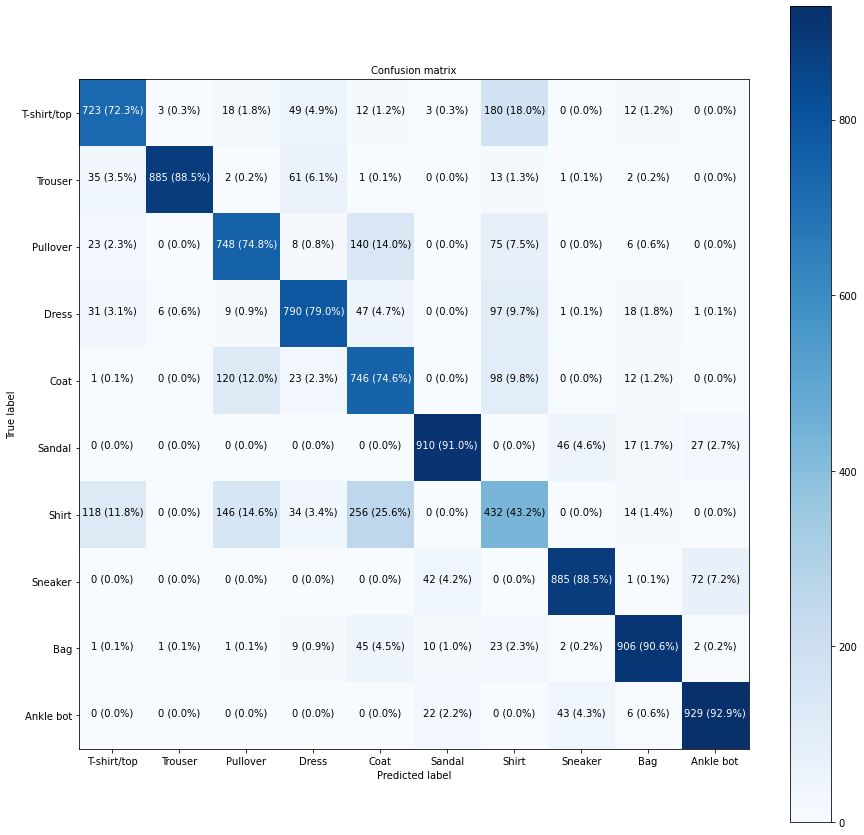

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

When working with images, it's a good idea to visualiza data, inputs and outputs

Let's create a function to:
- Plot a random imafe
- Make a prediction of the image
- Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel informacion (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# Shapes
weigths, weigths.shape

In [ ]:
# Now let's check out the bias vector
biases, biases.shape                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
# Lets check out another way of viewing our deep learning Model
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)